In [2]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt

In [3]:
%pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [4]:
%load_ext autotime

time: 0 ns (started: 2022-10-15 18:04:07 +02:00)


In [5]:
colnames = ['x', 'y', 'cost']
TSPA = pd.read_csv('data/TSPA.csv', header=None, sep=';', names=colnames)
TSPB = pd.read_csv('data/TSPB.csv', header=None, sep=';', names=colnames)

time: 15 ms (started: 2022-10-15 18:04:07 +02:00)


In [6]:
TSPA

,x,y,cost
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
...,...,...,...
195,1023,1258,197
196,3192,1271,1183
197,3735,1879,1461
198,3983,299,1309


time: 47 ms (started: 2022-10-15 18:04:07 +02:00)


In [7]:
tspa_dic = TSPA.to_dict('index')
tspb_dic = TSPB.to_dict('index')

time: 16 ms (started: 2022-10-15 18:04:08 +02:00)


In [8]:
# def get_costs(dic):
#     cost_dic = {}
#     for key in dic.keys():
#         cost_dic[key] = dic[key]['cost']
#     return cost_dic

# tspa_costs = get_costs(tspa_dic)
# tspb_costs = get_costs(tspb_dic)

time: 0 ns (started: 2022-10-15 18:04:08 +02:00)


In [9]:
# def get_distances_np(dic):
#     nodes_number = len(dic)
#     distances = np.empty(shape=(nodes_number, nodes_number))
#     for i in range(nodes_number-1):
#         for j in range(i+1, nodes_number):
#             starting_cords = np.array([dic[i]['x'], dic[i]['y']])
#             ending_cords = np.array([dic[j]['x'], dic[j]['y']])
#             dist = round(np.linalg.norm(starting_cords - ending_cords))
#             distances[i][j] = dist
#             distances[j][i] = dist
#     return distances


time: 0 ns (started: 2022-10-15 18:04:08 +02:00)


In [10]:
#get_distances_np(tspa_dic)#

time: 0 ns (started: 2022-10-15 18:04:08 +02:00)


In [11]:

def calculate_distances(node, data):
    distances = {}
    starting_cords = np.array([node['x'], node['y']])
    for key in data.keys():
        ending_cords = np.array([data[key]['x'], data[key]['y']])
        dist = round(np.linalg.norm(starting_cords - ending_cords))
        distances[key] = dist
    return distances

def calculate_single_distance(starting_node, ending_node):
    starting_cords = np.array([starting_node['x'], starting_node['y']])
    ending_cords = np.array([ending_node['x'], ending_node['y']])
    dist = round(np.linalg.norm(starting_cords - ending_cords))
    return dist

time: 15 ms (started: 2022-10-15 18:04:08 +02:00)


In [12]:
def random_solution(starting_node, data, total_cost, chosen_nodes):
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        random_node = random.choice(list(data.keys()))
        end_node = data[random_node]
        dist = calculate_single_distance(start_node, end_node)
        total_cost.append(start_node['cost'])
        total_cost.append(dist)
        random_solution(random_node, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes

time: 15 ms (started: 2022-10-15 18:04:08 +02:00)


In [13]:
def random_solution_iterate(data):
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        total_cost, chosen_nodes = random_solution(i, copy.deepcopy(data), total_cost = [], chosen_nodes = [])
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(len(min_cost_nodes))
    print(min_cost_nodes)

random_solution_iterate(tspa_dic)


239790
283798
100
[87, 12, 94, 40, 77, 190, 80, 195, 21, 67, 169, 199, 155, 140, 86, 115, 132, 138, 82, 146, 98, 28, 149, 151, 153, 16, 185, 113, 20, 175, 159, 18, 141, 122, 172, 174, 163, 79, 189, 78, 68, 42, 36, 49, 118, 117, 160, 182, 63, 104, 83, 167, 147, 116, 90, 162, 13, 60, 95, 156, 4, 65, 109, 3, 123, 97, 186, 62, 154, 165, 179, 45, 31, 55, 100, 125, 30, 22, 171, 44, 53, 197, 17, 164, 41, 130, 184, 96, 84, 194, 57, 137, 91, 128, 166, 29, 143, 14, 187, 15]
time: 797 ms (started: 2022-10-15 18:04:08 +02:00)


In [14]:
def nearest_neighbor(starting_node, data, total_cost,chosen_nodes):
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        distances = calculate_distances(start_node, data)
        key_min = min(distances.keys(), key=(lambda k: distances[k]))
        nearest_node = data[key_min]
        total_cost.append(start_node['cost'])
        total_cost.append(distances[key_min])
        nearest_neighbor(key_min, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes


time: 0 ns (started: 2022-10-15 18:04:09 +02:00)


In [15]:
def nearest_neighbor_iterate(data):
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        first_node = data[i]
        total_cost, chosen_nodes = nearest_neighbor(i, copy.deepcopy(data), total_cost = [], chosen_nodes = []) # 
        last_node = data[chosen_nodes[-1]]
        total_cost += calculate_single_distance(last_node, first_node)
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(min_cost_nodes)
    return min_cost, max_cost, min_cost_nodes


nn_points = nearest_neighbor_iterate(tspa_dic)[2]

108145
125277
[75, 189, 109, 119, 100, 33, 26, 13, 52, 148, 48, 92, 16, 152, 11, 162, 160, 198, 106, 125, 8, 105, 123, 124, 80, 191, 95, 169, 110, 139, 196, 51, 5, 112, 165, 73, 179, 12, 89, 42, 94, 122, 72, 190, 98, 156, 172, 66, 6, 68, 24, 67, 87, 144, 102, 44, 133, 154, 81, 171, 104, 184, 194, 79, 21, 157, 129, 170, 186, 127, 88, 153, 161, 76, 145, 151, 49, 38, 0, 115, 69, 149, 50, 121, 91, 114, 2, 4, 29, 187, 192, 150, 199, 39, 137, 177, 1, 41, 174, 173]
time: 38.7 s (started: 2022-10-15 18:04:09 +02:00)


In [16]:
def cycle_greedy(starting_node, data, total_cost,chosen_nodes):
    pass

time: 0 ns (started: 2022-10-15 18:04:48 +02:00)


In [17]:
#nn_points

time: 16 ms (started: 2022-10-15 18:04:48 +02:00)


101
101


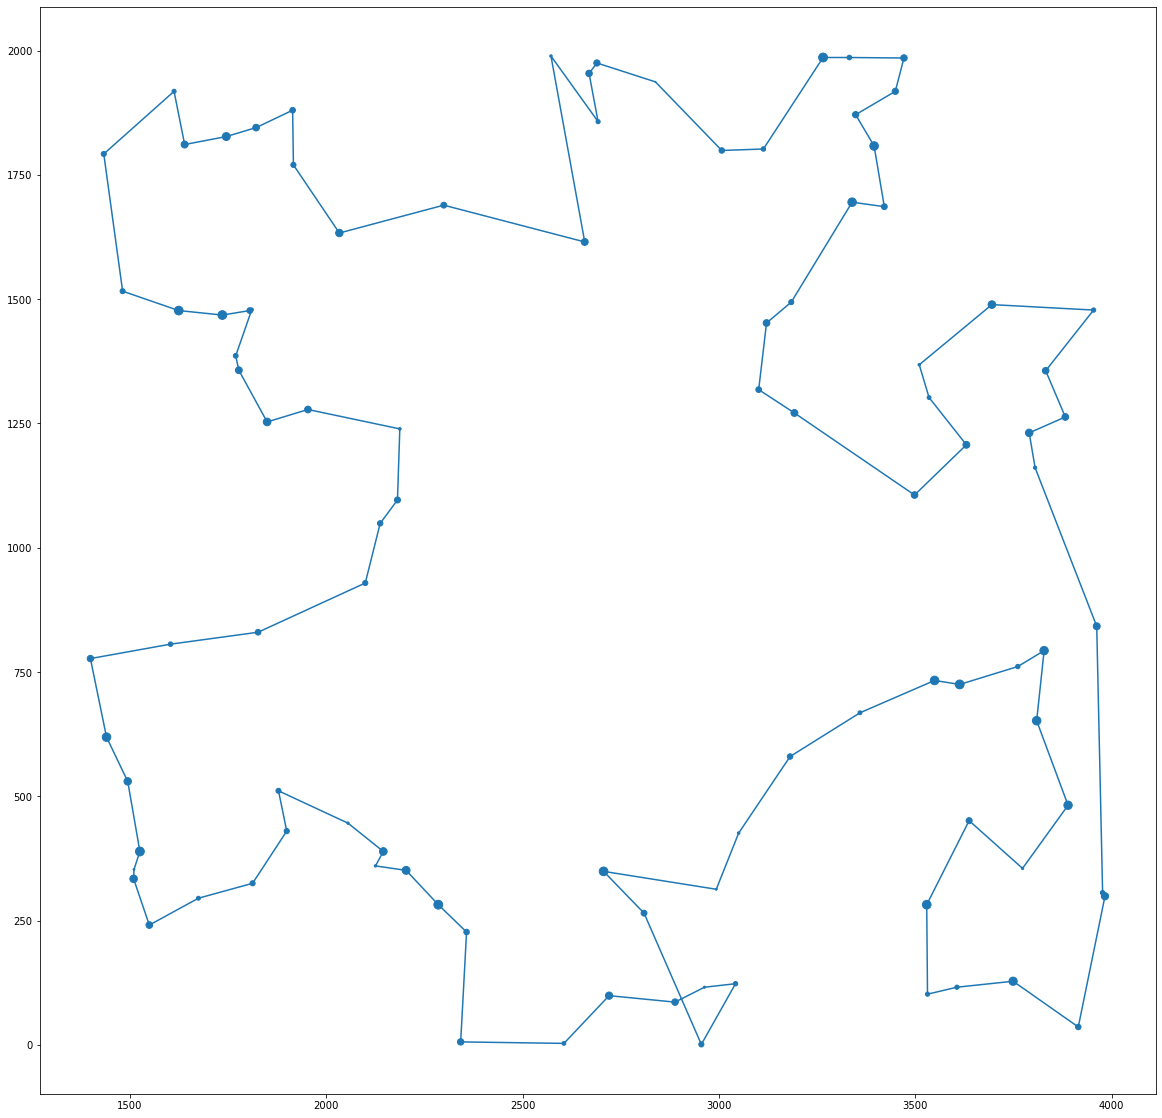

time: 359 ms (started: 2022-10-15 18:06:51 +02:00)


In [20]:
def plot_cycle(points):
    plt.rcParams["figure.figsize"] = (20,20)
    chosen_points_x = [tspa_dic[k]['x'] for k in points]
    chosen_points_x.append(chosen_points_x[0])
    chosen_points_y = [tspa_dic[k]['y'] for k in points]
    chosen_points_y.append(chosen_points_y[0])
    costs = [tspa_dic[k]['cost']/25 for k in points]
    costs.append(costs[0])
    print(len(chosen_points_x))
    print(len(costs))
    plt.plot(chosen_points_x, chosen_points_y)
    plt.scatter(chosen_points_x, chosen_points_y, s=costs)
    plt.show()

plot_cycle(nn_points)